#Explicando cada Coluna
RegionCode (Código da Região): Um código numérico que identifica a região.

RegionName (Nome da Região): O nome da região geográfica ou administrativa.

CountryCode (Código do País): Um código numérico que identifica o país.

CountryName (Nome do País): O nome do país.

Year (Ano): O ano ao qual os dados se referem.

Sex (Sexo): O sexo dos indivíduos referidos.

AgeGroup (Grupo de idade): A faixa etária em que os dados se enquadram, como 15 a 24 anos ou mais de 65 anos.

Generation (Geração): O número de suicídios registrados naquele país, ano, faixa etária e gênero. //Classificação da geração, à qual esta geração se refere.

SuicideCount (Contagem de Suicídios): O número de suicídios relatados para o ano e região especificados.

CauseSpecificDeathPercentage (Porcentagem de Mortes por Causa Específica): A porcentagem de mortes atribuída à causa específica de suicídio em relação ao total de mortes.

StdDeathRate (Taxa de Morte Padronizada): A taxa de mortalidade padronizada para a causa específica de suicídio.

DeathRatePer100K (Taxa de Mortalidade por 100 mil habitantes): A taxa de mortalidade por suicídio por 100 mil habitantes.

Population (População): O número total de habitantes na região e ano especificados.

GDP (Produto Interno Bruto): O Produto Interno Bruto da região ou país no ano específico.

GDPPerCapita (PIB per capita): O Produto Interno Bruto per capita, ou seja, o valor total do Produto Interno Bruto dividido pela população.

GNI (Renda Nacional Bruta): A Renda Nacional Bruta da região ou país no ano específico.

GrossNationalIncome (Renda Nacional Bruta): Semelhante ao PIB, mas também inclui os rendimentos que os cidadãos recebem do exterior.

GNIPerCapita (Renda Nacional Bruta per capita): A Renda Nacional Bruta per capita, ou seja, o valor total da Renda Nacional Bruta dividido pela população.

InflationRate (Taxa de Inflação): A taxa de inflação para o ano específico na região ou país.

EmploymentPopulationRatio (Taxa de Emprego sobre a População): A proporção da população em idade de trabalho que está empregada.







#Analise Taxa de Suicídio 1990 - 2022


In [ ]:
# Importações necessárias

# cálculos numéricos
import numpy as np

# ler, agrupar, organizar, explorar, filtrar, manipular e combinar dados
# suporta variados formatos, como CSV, Excel e JSON e que possibilita
# misturar diferentes bancos de dados simultaneamente
import pandas as pd

# criação de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# lidar com grandes quantidades de números, lidar com estatísticas, integração numérica,
# solução de equações diferenciais, otimização, integração, álgebra linear, funções especiais,
# polinômios
from scipy import stats

# aplicação prática de machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

from xgboost import XGBRegressor

# Medidas de avaliação
from sklearn import metrics
# from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

# Separação dos arquivos treino, teste
from sklearn.model_selection import train_test_split

# Visualizar todas as colunas e linhas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Conexão com o drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Faz a leitura do arquivo train.csv
df_age_suicide_rates = pd.read_csv('/content/drive/MyDrive/MEU_trabas_sem /age_std_suicide_rates_1990-2022 - age_std_suicide_rates_1990-2022.csv')
df_suicide_rates = pd.read_csv('/content/drive/MyDrive/MEU_trabas_sem /suicide_rates_1990-2022 - suicide_rates_1990-2022.csv')

- Verificando dados das tabelas

In [ ]:
df_age_suicide_rates.tail()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio
5923,AF,Africa,MYT,Mayotte,2015,Female,0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5924,AF,Africa,REU,R?union,2016,Male,68,2.636681,15.399045,16.144005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5925,AF,Africa,REU,R?union,2016,Female,17,0.796253,3.521507,3.790134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5926,AF,Africa,REU,R?union,2015,Male,79,3.212688,18.702514,18.895318,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5927,AF,Africa,REU,R?union,2015,Female,20,0.965251,3.887067,4.491697,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_suicide_rates.head()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
3,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
4,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,5.0,3.401361,3.531073,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315


In [ ]:
df_age_suicide_rates.describe()

,Year,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio
count,5928.000000,5928.000000,5927.000000,5720.000000,5720.000000,5.632000e+03,5.566000e+03,5566.000000,5.430000e+03,5390.000000,5205.000000,5372.000000
mean,2005.740047,1267.660088,1.264219,9.649577,10.688010,2.456184e+07,4.883873e+11,17423.508254,4.975887e+11,22147.217069,20.286455,55.750811
std,8.745704,3887.349179,1.188728,10.715036,11.763056,4.531538e+07,1.653792e+12,19333.786133,1.688950e+12,18888.063046,163.114790,8.141714
min,1990.000000,0.000000,0.000000,0.000000,0.000000,4.054200e+04,2.197630e+08,60.235121,2.082832e+08,780.000000,-10.630097,32.026000
25%,1999.000000,30.000000,0.431064,2.554089,2.741542,2.613805e+06,1.163490e+10,3945.243570,1.176850e+10,8670.000000,1.498961,50.791000
50%,2006.000000,226.500000,0.882576,6.061477,6.813998,6.888434e+06,6.268216e+10,9708.141348,5.987715e+10,16150.000000,3.038888,56.021000
75%,2013.000000,836.000000,1.870304,13.064868,14.354849,2.533364e+07,3.010000e+11,25197.265600,3.055000e+11,29530.000000,6.536199,60.415250
max,2022.000000,51464.000000,16.666667,80.261488,83.522190,3.320316e+08,2.330000e+13,133711.794400,2.370000e+13,152630.000000,4734.914347,87.518000


In [ ]:
df_suicide_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118560 entries, 0 to 118559
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   RegionCode                    118560 non-null  object 
 1   RegionName                    118560 non-null  object 
 2   CountryCode                   118560 non-null  object 
 3   CountryName                   118560 non-null  object 
 4   Year                          118560 non-null  int64  
 5   Sex                           118560 non-null  object 
 6   AgeGroup                      118560 non-null  object 
 7   Generation                    118560 non-null  object 
 8   SuicideCount                  118096 non-null  float64
 9   CauseSpecificDeathPercentage  114271 non-null  float64
 10  DeathRatePer100K              107896 non-null  float64
 11  Population                    112640 non-null  float64
 12  GDP                           111320 non-nul

In [ ]:
df_age_suicide_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5928 entries, 0 to 5927
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RegionCode                    5928 non-null   object 
 1   RegionName                    5928 non-null   object 
 2   CountryCode                   5928 non-null   object 
 3   CountryName                   5928 non-null   object 
 4   Year                          5928 non-null   int64  
 5   Sex                           5928 non-null   object 
 6   SuicideCount                  5928 non-null   int64  
 7   CauseSpecificDeathPercentage  5927 non-null   float64
 8   StdDeathRate                  5720 non-null   float64
 9   DeathRatePer100K              5720 non-null   float64
 10  Population                    5632 non-null   float64
 11  GDP                           5566 non-null   float64
 12  GDPPerCapita                  5566 non-null   float64
 13  GNI

- Verificando regiões

In [ ]:
# descobrir os dados da coluna regiao
variedade_dados = df_suicide_rates['RegionName'].unique()

print("Variedade de dados na coluna regiao:")
print(variedade_dados)

Variedade de dados na coluna regiao:
['Europe' 'Central and South America' 'Asia' 'Oceania'
 'North America and the Caribbean' 'Africa']


#Constatando índice populacional das regiões

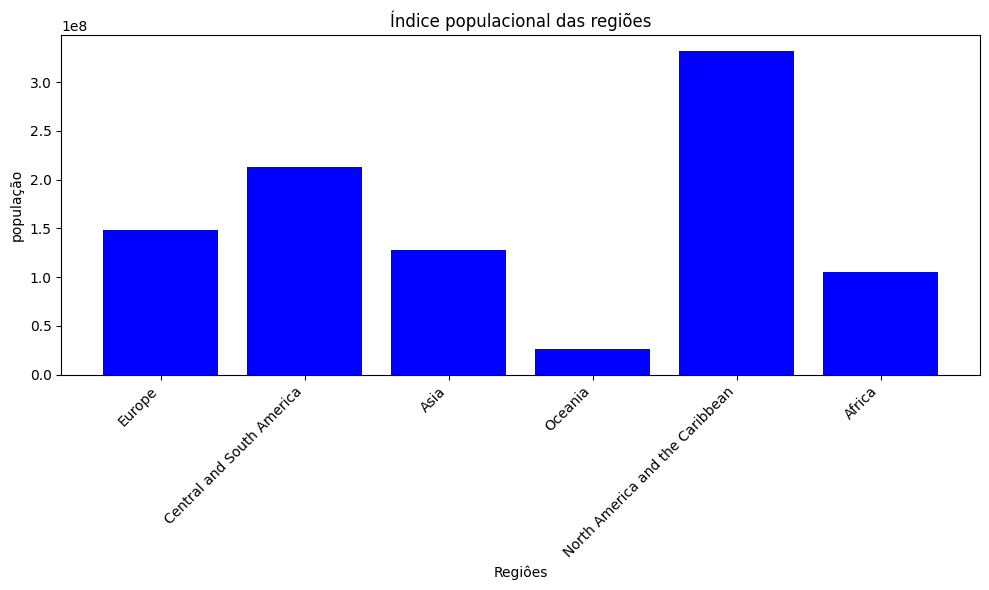

In [ ]:
#comparando a taxa de suicidio de alguns paises
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.bar(df_suicide_rates['RegionName'], df_suicide_rates['Population'], color='blue', alpha=0.7)
plt.xlabel('Regiôes')
plt.ylabel('população')
plt.title('Índice populacional das regiões')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

O Caribe e América do Norte lideram com maior índice populacional, seguido da América central e Sul em segundo lugar.<br>
África e Oceania estão com menor índice populacional.

# Realizando análise geral do número de suicídio por região







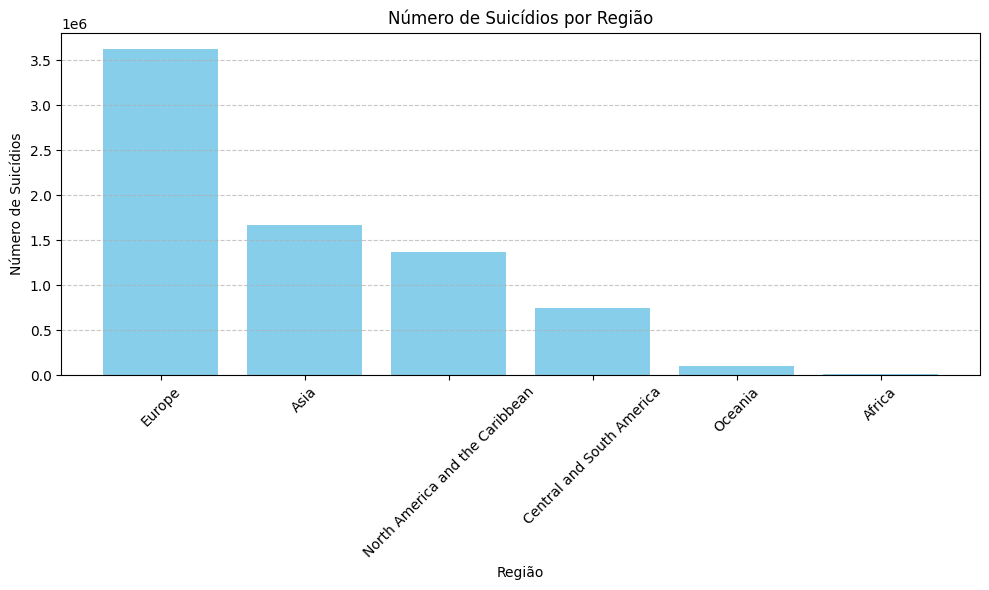

In [ ]:
import matplotlib.pyplot as plt

# Agrupar os dados por região e calcular o número total de suicídios em cada região
suicidios_por_regiao = df_suicide_rates.groupby('RegionName')['SuicideCount'].sum().reset_index()

# Ordenar os dados pelo número total de suicídios em ordem decrescente
suicidios_por_regiao = suicidios_por_regiao.sort_values(by='SuicideCount', ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(suicidios_por_regiao['RegionName'], suicidios_por_regiao['SuicideCount'], color='skyblue')
plt.title('Número de Suicídios por Região')
plt.xlabel('Região')
plt.ylabel('Número de Suicídios')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adicionar linhas de grade no eixo y
plt.tight_layout()  # Ajustar layout para evitar cortes
plt.show()

Podemos reparar que há uma super concentração de suicídio na europa, sendo mais do que a metade dos índices da Ásia que se encontra em segundo lugar no ranking.<br>
A África se encontra com o menor número de casos, sendo quase imperceptível quando comparado aos demais.

# Trabalhando os dados com um df_menor





In [ ]:
  df_menor = df_suicide_rates[[
  'RegionName',
  'CountryCode',
  'CountryName',
  'Year',
  'Sex',
  'AgeGroup',
  'Generation',
  'SuicideCount',
  'Population',
  'GDP',
  'GDPPerCapita',
  'GrossNationalIncome',
  'GNIPerCapita',
  'InflationRate',
  'EmploymentPopulationRatio'
  ]]
df_menor.head(3)

,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
1,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
2,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315


In [ ]:
df_menor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118560 entries, 0 to 118559
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   RegionName                 118560 non-null  object 
 1   CountryCode                118560 non-null  object 
 2   CountryName                118560 non-null  object 
 3   Year                       118560 non-null  int64  
 4   Sex                        118560 non-null  object 
 5   AgeGroup                   118560 non-null  object 
 6   Generation                 118560 non-null  object 
 7   SuicideCount               118096 non-null  float64
 8   Population                 112640 non-null  float64
 9   GDP                        111320 non-null  float64
 10  GDPPerCapita               111320 non-null  float64
 11  GrossNationalIncome        108600 non-null  float64
 12  GNIPerCapita               107800 non-null  float64
 13  InflationRate              10

- Verificando dados faltantes em cada coluna do DataFrame

In [ ]:
dados_faltantes = df_menor.isna().sum()

# Exibir os dados faltantes
print("Dados faltantes em cada coluna:")
print(dados_faltantes)

Dados faltantes em cada coluna:
RegionName                       0
CountryCode                      0
CountryName                      0
Year                             0
Sex                              0
AgeGroup                         0
Generation                       0
SuicideCount                   464
Population                    5920
GDP                           7240
GDPPerCapita                  7240
GrossNationalIncome           9960
GNIPerCapita                 10760
InflationRate                14460
EmploymentPopulationRatio    11120
dtype: int64


#Filtrando os dados e separando por regiões


- África

In [ ]:
df_Africa = df_menor[['RegionName',
 'CountryCode',
 'CountryName',
 'Year',
 'Sex',
 'AgeGroup',
 'Generation',
 'SuicideCount',
 'Population',
 'GDP',
 'GDPPerCapita',
 'GrossNationalIncome',
 'GNIPerCapita',
 'InflationRate',
 'EmploymentPopulationRatio']].loc[df_menor['RegionName'] == 'Africa']
df_Africa.head()

,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
14760,Africa,CPV,Cabo Verde,2011,Male,0-14 years,Generation Alpha,0.0,527521.0,2.046818e+09,3880.069205,1.920604e+09,5970.0,4.473883,52.644
14761,Africa,CPV,Cabo Verde,2011,Male,0-14 years,Generation Alpha,0.0,527521.0,2.046818e+09,3880.069205,1.920604e+09,5970.0,4.473883,52.644
14762,Africa,CPV,Cabo Verde,2011,Male,0-14 years,Generation Alpha,0.0,527521.0,2.046818e+09,3880.069205,1.920604e+09,5970.0,4.473883,52.644
14763,Africa,CPV,Cabo Verde,2011,Male,0-14 years,Generation Alpha,3.0,527521.0,2.046818e+09,3880.069205,1.920604e+09,5970.0,4.473883,52.644
14764,Africa,CPV,Cabo Verde,2011,Male,15-24 years,Generation Z,1.0,527521.0,2.046818e+09,3880.069205,1.920604e+09,5970.0,4.473883,52.644


- Ásia

In [ ]:
df_Asia = df_menor[['RegionName',
 'CountryCode',
 'CountryName',
 'Year',
 'Sex',
 'AgeGroup',
 'Generation',
 'SuicideCount',
 'Population',
 'GDP',
 'GDPPerCapita',
 'GrossNationalIncome',
 'GNIPerCapita',
 'InflationRate',
 'EmploymentPopulationRatio']].loc[df_menor['RegionName'] == 'Asia']
df_Asia.head()

,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
2040,Asia,ARM,Armenia,1991,Male,0-14 years,Generation Alpha,0.0,3617631.0,2.069870e+09,572.161763,NaN,2470.0,NaN,64.064
2041,Asia,ARM,Armenia,1991,Male,0-14 years,Generation Alpha,0.0,3617631.0,2.069870e+09,572.161763,NaN,2470.0,NaN,64.064
2042,Asia,ARM,Armenia,1991,Male,0-14 years,Generation Alpha,0.0,3617631.0,2.069870e+09,572.161763,NaN,2470.0,NaN,64.064
2043,Asia,ARM,Armenia,1991,Male,0-14 years,Generation Alpha,0.0,3617631.0,2.069870e+09,572.161763,NaN,2470.0,NaN,64.064
2044,Asia,ARM,Armenia,1991,Male,15-24 years,Generation Z,4.0,3617631.0,2.069870e+09,572.161763,NaN,2470.0,NaN,64.064


- América Central e Sul

In [ ]:
df_Central_South_America = df_menor[['RegionName',
 'CountryCode',
 'CountryName',
 'Year',
 'Sex',
 'AgeGroup',
 'Generation',
 'SuicideCount',
 'Population',
 'GDP',
 'GDPPerCapita',
 'GrossNationalIncome',
 'GNIPerCapita',
 'InflationRate',
 'EmploymentPopulationRatio']].loc[df_menor['RegionName'] == 'Central and South America']
df_Central_South_America.head()


,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
760,Central and South America,ARG,Argentina,1991,Male,0-14 years,Generation Alpha,0.0,33105763.0,1.897200e+11,5730.72381,1.278050e+11,7740.0,NaN,56.747
761,Central and South America,ARG,Argentina,1991,Male,0-14 years,Generation Alpha,0.0,33105763.0,1.897200e+11,5730.72381,1.278050e+11,7740.0,NaN,56.747
762,Central and South America,ARG,Argentina,1991,Male,0-14 years,Generation Alpha,1.0,33105763.0,1.897200e+11,5730.72381,1.278050e+11,7740.0,NaN,56.747
763,Central and South America,ARG,Argentina,1991,Male,0-14 years,Generation Alpha,27.0,33105763.0,1.897200e+11,5730.72381,1.278050e+11,7740.0,NaN,56.747
764,Central and South America,ARG,Argentina,1991,Male,15-24 years,Generation Z,72.0,33105763.0,1.897200e+11,5730.72381,1.278050e+11,7740.0,NaN,56.747


- Europa

In [ ]:
df_Europe = df_menor[['RegionName',
 'CountryCode',
 'CountryName',
 'Year',
 'Sex',
 'AgeGroup',
 'Generation',
 'SuicideCount',
 'Population',
 'GDP',
 'GDPPerCapita',
 'GrossNationalIncome',
 'GNIPerCapita',
 'InflationRate',
 'EmploymentPopulationRatio']].loc[df_menor['RegionName'] == 'Europe']
df_Europe.head()

,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
1,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
2,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
3,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
4,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,5.0,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315


- América do norte e Caribe

In [ ]:
df_CaribNorth_America = df_menor[['RegionName',
 'CountryCode',
 'CountryName',
 'Year',
 'Sex',
 'AgeGroup',
 'Generation',
 'SuicideCount',
 'Population',
 'GDP',
 'GDPPerCapita',
 'GrossNationalIncome',
 'GNIPerCapita',
 'InflationRate',
 'EmploymentPopulationRatio']].loc[df_menor['RegionName'] == 'North America and the Caribbean']
df_CaribNorth_America.head()

,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
6120,North America and the Caribbean,BHS,Bahamas,1993,Male,0-14 years,Generation Alpha,0.0,288164.0,3.092000e+09,10730.00097,3.066883e+09,18830.0,2.722898,64.203
6121,North America and the Caribbean,BHS,Bahamas,1993,Male,0-14 years,Generation Alpha,0.0,288164.0,3.092000e+09,10730.00097,3.066883e+09,18830.0,2.722898,64.203
6122,North America and the Caribbean,BHS,Bahamas,1993,Male,0-14 years,Generation Alpha,0.0,288164.0,3.092000e+09,10730.00097,3.066883e+09,18830.0,2.722898,64.203
6123,North America and the Caribbean,BHS,Bahamas,1993,Male,0-14 years,Generation Alpha,0.0,288164.0,3.092000e+09,10730.00097,3.066883e+09,18830.0,2.722898,64.203
6124,North America and the Caribbean,BHS,Bahamas,1993,Male,15-24 years,Generation Z,1.0,288164.0,3.092000e+09,10730.00097,3.066883e+09,18830.0,2.722898,64.203


- Oceania

In [ ]:
df_Oceania = df_menor[['RegionName',
 'CountryCode',
 'CountryName',
 'Year',
 'Sex',
 'AgeGroup',
 'Generation',
 'SuicideCount',
 'Population',
 'GDP',
 'GDPPerCapita',
 'GrossNationalIncome',
 'GNIPerCapita',
 'InflationRate',
 'EmploymentPopulationRatio']].loc[df_menor['RegionName'] == 'Oceania']
df_Oceania.head()

,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
2920,Oceania,AUS,Australia,1991,Male,0-14 years,Generation Alpha,0.0,17284036.0,3.259670e+11,18859.40796,3.152630e+11,17120.0,3.176675,57.094
2921,Oceania,AUS,Australia,1991,Male,0-14 years,Generation Alpha,0.0,17284036.0,3.259670e+11,18859.40796,3.152630e+11,17120.0,3.176675,57.094
2922,Oceania,AUS,Australia,1991,Male,0-14 years,Generation Alpha,0.0,17284036.0,3.259670e+11,18859.40796,3.152630e+11,17120.0,3.176675,57.094
2923,Oceania,AUS,Australia,1991,Male,0-14 years,Generation Alpha,7.0,17284036.0,3.259670e+11,18859.40796,3.152630e+11,17120.0,3.176675,57.094
2924,Oceania,AUS,Australia,1991,Male,15-24 years,Generation Z,120.0,17284036.0,3.259670e+11,18859.40796,3.152630e+11,17120.0,3.176675,57.094


# Quantidade de ocorrências em cada região e seu país com maior número de casos

# África



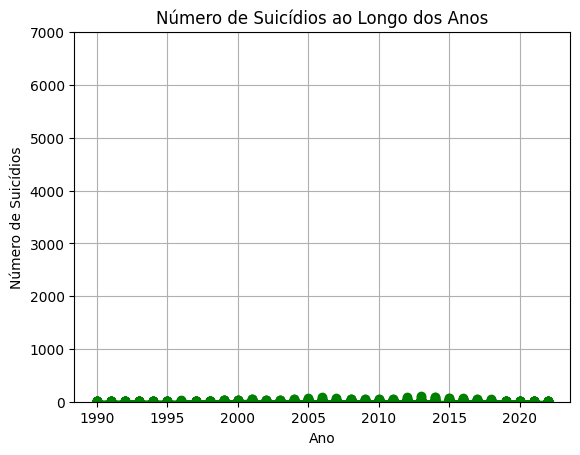

In [ ]:
# Plotando gráfico de séries temporais do número de suicídios ao longo dos anos

# Definir o limite de valor para o eixo y
limite_inferior = 0  # Defina o limite inferior desejado
limite_superior = 7000  # Defina o limite superior desejado

plt.plot(df_Africa['Year'],df_Africa['SuicideCount'], marker='o', linestyle='-', color='green')
plt.xlabel('Ano')
plt.ylabel('Número de Suicídios')
plt.title('Número de Suicídios ao Longo dos Anos')
plt.grid(True)
plt.ylim(limite_inferior, limite_superior)
plt.show()

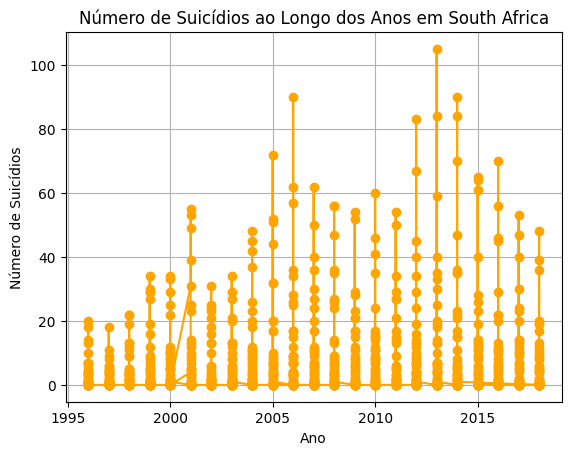

In [ ]:
# Escolhendo o país para plotar no gráfico
pais_especifico = 'South Africa'

# Filtrar os dados para o país específico
dados_pais_especifico = df_Africa[df_Africa['CountryName'] == pais_especifico]

# Plotar o gráfico de séries temporais para o país específico
plt.plot(dados_pais_especifico['Year'], dados_pais_especifico['SuicideCount'], marker='o', linestyle='-', color='orange')
plt.xlabel('Ano')
plt.ylabel('Número de Suicídios')
plt.title(f'Número de Suicídios ao Longo dos Anos em {pais_especifico}')
plt.grid(True)
#plt.ylim(limite_inferior, limite_superior)
plt.show()

# Ásia



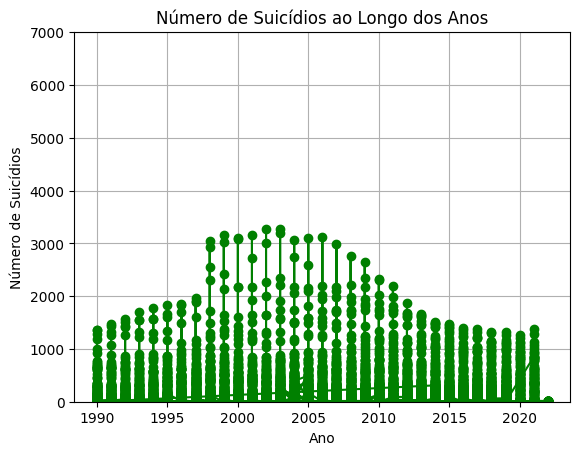

In [ ]:
# Plotando gráfico de séries temporais do número de suicídios ao longo dos anos

# Definir o limite de valor para o eixo y
limite_inferior = 0  # Defina o limite inferior desejado
limite_superior = 7000  # Defina o limite superior desejado

plt.plot(df_Asia['Year'],df_Asia['SuicideCount'], marker='o', linestyle='-', color='green')
plt.xlabel('Ano')
plt.ylabel('Número de Suicídios')
plt.title('Número de Suicídios ao Longo dos Anos')
plt.grid(True)
plt.ylim(limite_inferior, limite_superior)
plt.show()

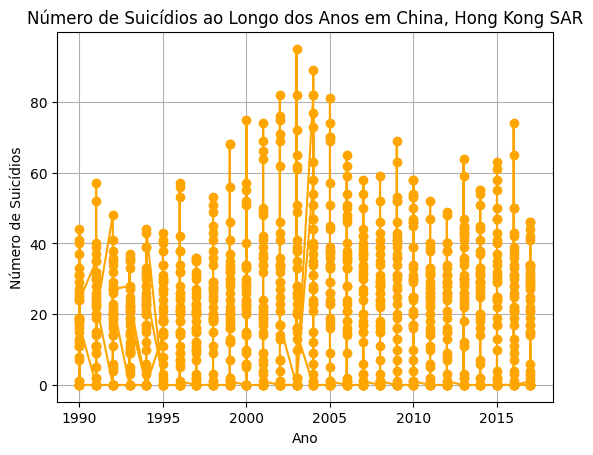

In [ ]:
# Escolhendo o país para plotar no gráfico
pais_especifico = 'China, Hong Kong SAR'

# Filtrar os dados para o país específico
dados_pais_especifico = df_Asia[df_Asia['CountryName'] == pais_especifico]

# Plotar o gráfico de séries temporais para o país específico
plt.plot(dados_pais_especifico['Year'], dados_pais_especifico['SuicideCount'], marker='o', linestyle='-', color='orange')
plt.xlabel('Ano')
plt.ylabel('Número de Suicídios')
plt.title(f'Número de Suicídios ao Longo dos Anos em {pais_especifico}')
plt.grid(True)
#plt.ylim(limite_inferior2, limite_superior2)
plt.show()

# América Central e Sul


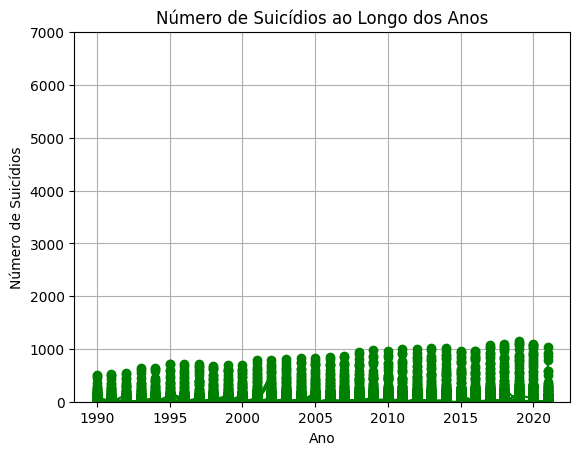

In [ ]:
# Plotando gráfico de séries temporais do número de suicídios ao longo dos anos

# Definir o limite de valor para o eixo y
limite_inferior = 0  # Defina o limite inferior desejado
limite_superior = 7000  # Defina o limite superior desejado

plt.plot(df_Central_South_America['Year'],df_Central_South_America['SuicideCount'], marker='o', linestyle='-', color='green')
plt.xlabel('Ano')
plt.ylabel('Número de Suicídios')
plt.title('Número de Suicídios ao Longo dos Anos')
plt.grid(True)
plt.ylim(limite_inferior, limite_superior)
plt.show()

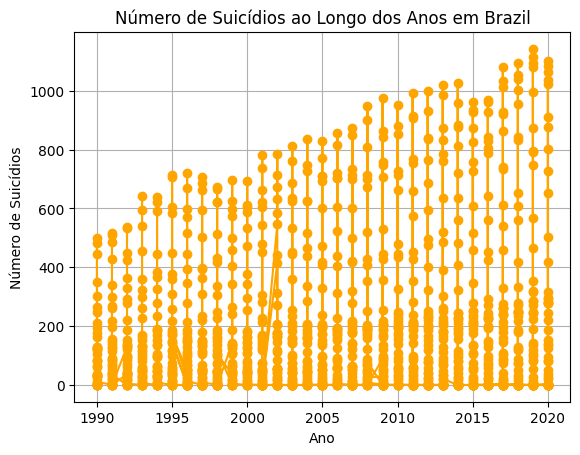

In [ ]:
# Escolhendo o país para plotar no gráfico
pais_especifico = 'Brazil'
# Filtrar os dados para o país específico
dados_pais_especifico = df_Central_South_America[df_Central_South_America['CountryName'] == pais_especifico]

# Plotar o gráfico de séries temporais para o país específico
plt.plot(dados_pais_especifico['Year'], dados_pais_especifico['SuicideCount'], marker='o', linestyle='-', color='orange')
plt.xlabel('Ano')
plt.ylabel('Número de Suicídios')
plt.title(f'Número de Suicídios ao Longo dos Anos em {pais_especifico}')
plt.grid(True)
#plt.ylim(limite_inferior, limite_superior)
plt.show()

#Europa



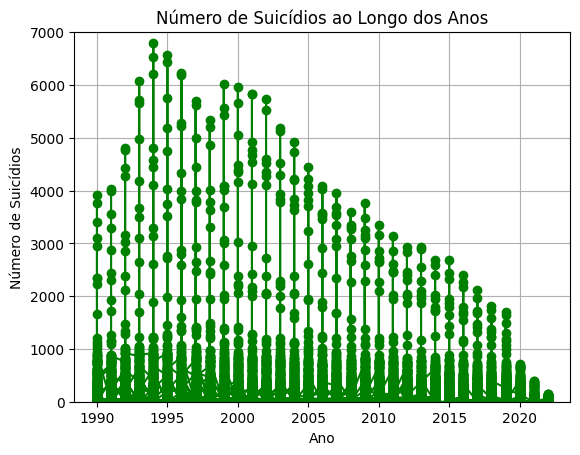

In [ ]:
# Plotando gráfico de séries temporais do número de suicídios ao longo dos anos

# Definir o limite de valor para o eixo y
limite_inferior = 0  # Defina o limite inferior desejado
limite_superior = 7000  # Defina o limite superior desejado

plt.plot(df_Europe['Year'],df_Europe['SuicideCount'], marker='o', linestyle='-', color='green')
plt.xlabel('Ano')
plt.ylabel('Número de Suicídios')
plt.title('Número de Suicídios ao Longo dos Anos')
plt.grid(True)
plt.ylim(limite_inferior, limite_superior)
plt.show()

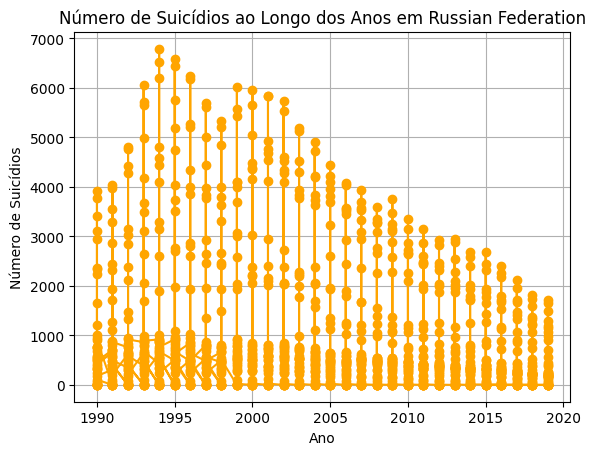

In [ ]:
# Escolhendo o país para plotar no gráfico
pais_especifico = 'Russian Federation'
# Filtrar os dados para o país específico
dados_pais_especifico = df_Europe[df_Europe['CountryName'] == pais_especifico]

# Plotar o gráfico de séries temporais para o país específico
plt.plot(dados_pais_especifico['Year'], dados_pais_especifico['SuicideCount'], marker='o', linestyle='-', color='orange')
plt.xlabel('Ano')
plt.ylabel('Número de Suicídios')
plt.title(f'Número de Suicídios ao Longo dos Anos em {pais_especifico}')
plt.grid(True)
#plt.ylim(limite_inferior, limite_superior)
plt.show()

# América do norte e Caribe



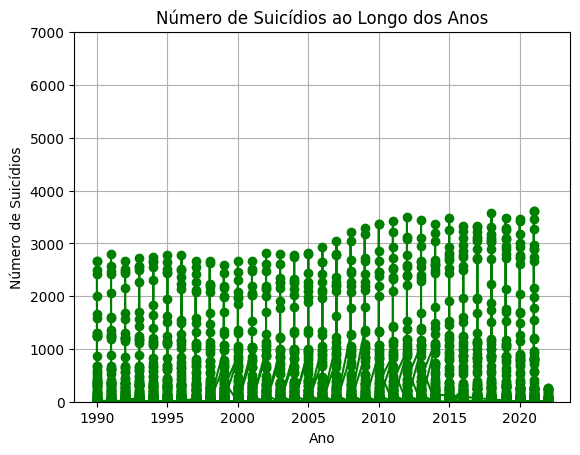

In [ ]:
# Plotando gráfico de séries temporais do número de suicídios ao longo dos anos

# Definir o limite de valor para o eixo y
limite_inferior = 0  # Defina o limite inferior desejado
limite_superior = 7000  # Defina o limite superior desejado

plt.plot(df_CaribNorth_America['Year'],df_CaribNorth_America['SuicideCount'], marker='o', linestyle='-', color='green')
plt.xlabel('Ano')
plt.ylabel('Número de Suicídios')
plt.title('Número de Suicídios ao Longo dos Anos')
plt.grid(True)
plt.ylim(limite_inferior, limite_superior)
plt.show()

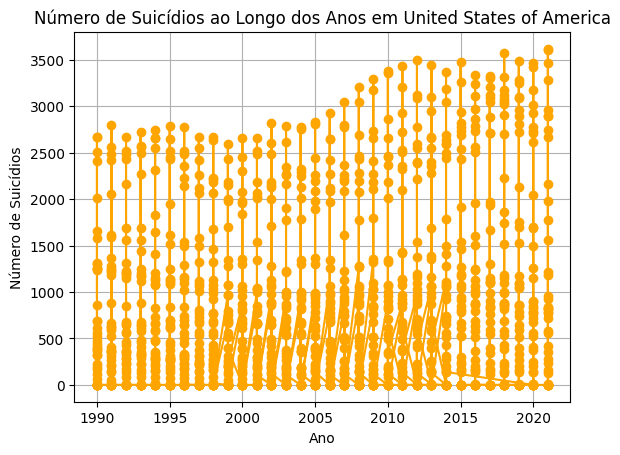

In [ ]:
# Escolhendo o país para plotar no gráfico
pais_especifico = 'United States of America'

# Filtrar os dados para o país específico
dados_pais_especifico = df_CaribNorth_America[df_CaribNorth_America['CountryName'] == pais_especifico]

# Plotar o gráfico de séries temporais para o país específico
plt.plot(dados_pais_especifico['Year'], dados_pais_especifico['SuicideCount'], marker='o', linestyle='-', color='orange')
plt.xlabel('Ano')
plt.ylabel('Número de Suicídios')
plt.title(f'Número de Suicídios ao Longo dos Anos em {pais_especifico}')
plt.grid(True)
#plt.ylim(limite_inferior, limite_superior)
plt.show()

#Oceania



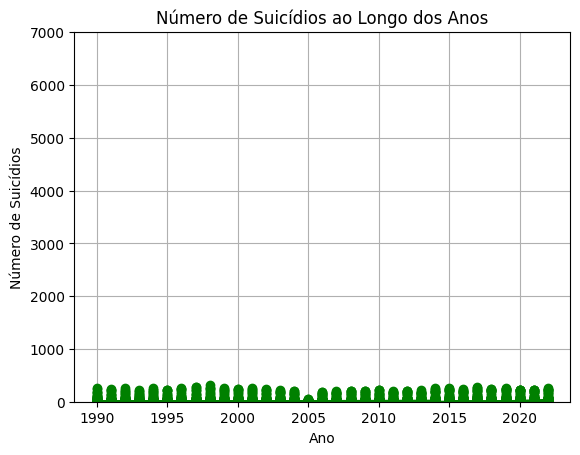

In [ ]:
# Plotando gráfico de séries temporais do número de suicídios ao longo dos anos

# Definir o limite de valor para o eixo y
limite_inferior = 0  # Defina o limite inferior desejado
limite_superior = 7000  # Defina o limite superior desejado

plt.plot(df_Oceania['Year'],df_Oceania['SuicideCount'], marker='o', linestyle='-', color='green')
plt.xlabel('Ano')
plt.ylabel('Número de Suicídios')
plt.title('Número de Suicídios ao Longo dos Anos')
plt.grid(True)
plt.ylim(limite_inferior, limite_superior)
plt.show()

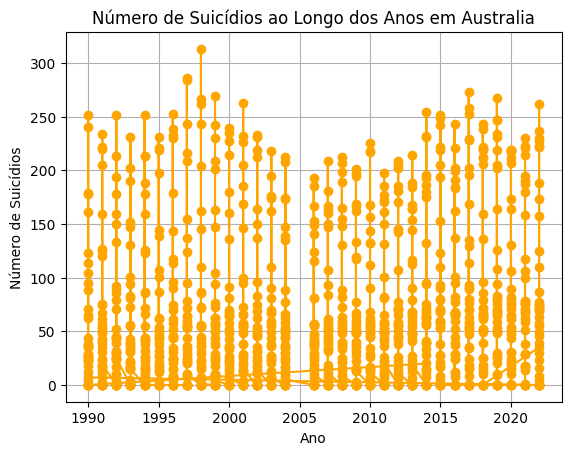

In [ ]:
# Escolhendo o país para plotar no gráfico
pais_especifico = 'Australia'

# Filtrar os dados para o país específico
dados_pais_especifico = df_Oceania[df_Oceania['CountryName'] == pais_especifico]

# Plotar o gráfico de séries temporais para o país específico
plt.plot(dados_pais_especifico['Year'], dados_pais_especifico['SuicideCount'], marker='o', linestyle='-', color='orange')
plt.xlabel('Ano')
plt.ylabel('Número de Suicídios')
plt.title(f'Número de Suicídios ao Longo dos Anos em {pais_especifico}')
plt.grid(True)
#plt.ylim(limite_inferior, limite_superior)

# Relação do PIB de cada país por região e taxa de suicídio respectivamente

- América Central e Sul

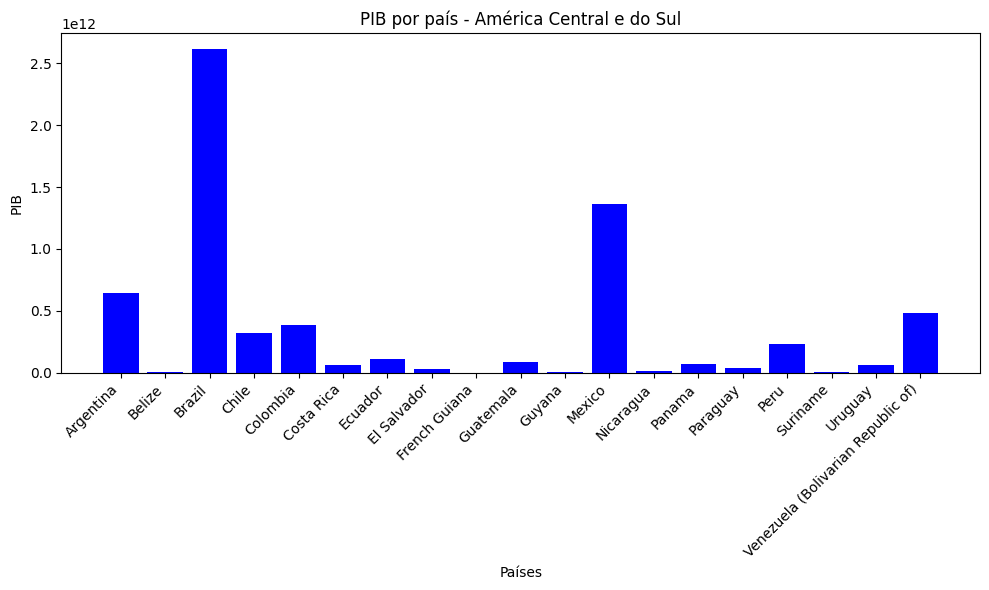

In [ ]:
# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.bar(df_Central_South_America['CountryName'], df_Central_South_America['GDP'], color='blue', alpha=0.7)
plt.xlabel('Países')
plt.ylabel('PIB')
plt.title('PIB por país - América Central e do Sul')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

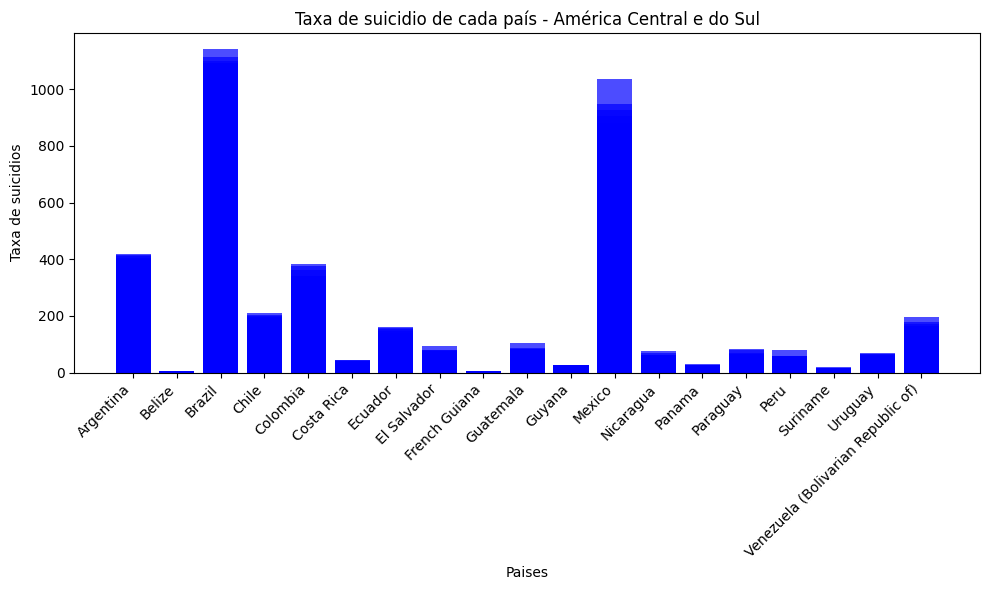

In [ ]:
#comparando a taxa de suicidio de alguns paises
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.bar(df_Central_South_America['CountryName'], df_Central_South_America['SuicideCount'], color='blue', alpha=0.7)
plt.xlabel('Paises')
plt.ylabel('Taxa de suicidios')
plt.title('Taxa de suicidio de cada país - América Central e do Sul')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

- América do Norte e Caribe

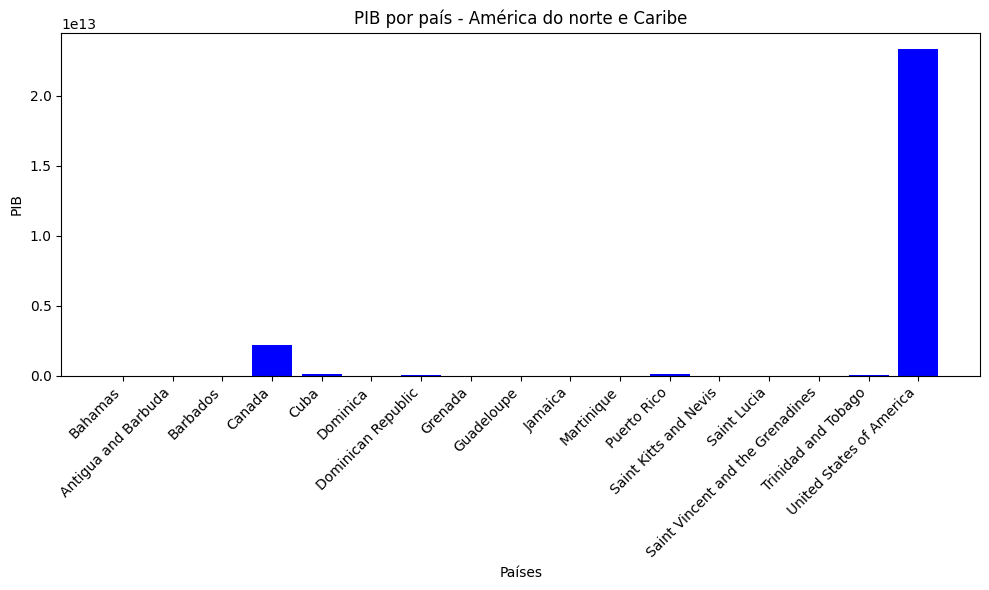

In [ ]:
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.bar(df_CaribNorth_America['CountryName'], df_CaribNorth_America['GDP'], color='blue', alpha=0.7)
plt.xlabel('Países')
plt.ylabel('PIB')
plt.title('PIB por país - América do norte e Caribe')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

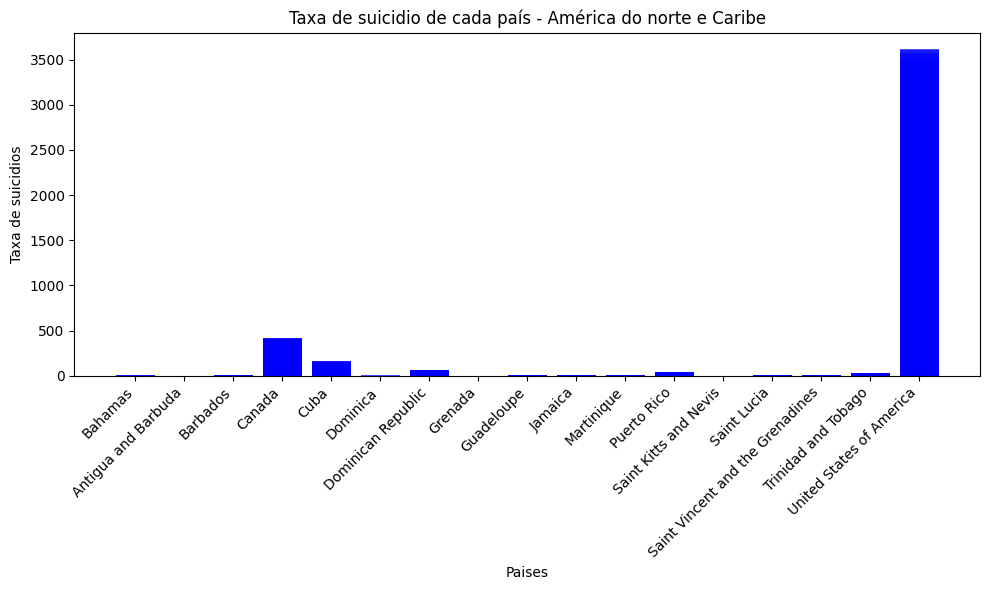

In [ ]:
#comparando a taxa de suicidio de alguns paises
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.bar(df_CaribNorth_America['CountryName'], df_CaribNorth_America['SuicideCount'], color='blue', alpha=0.7)
plt.xlabel('Paises')
plt.ylabel('Taxa de suicidios')
plt.title('Taxa de suicidio de cada país - América do norte e Caribe')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

- Oceania

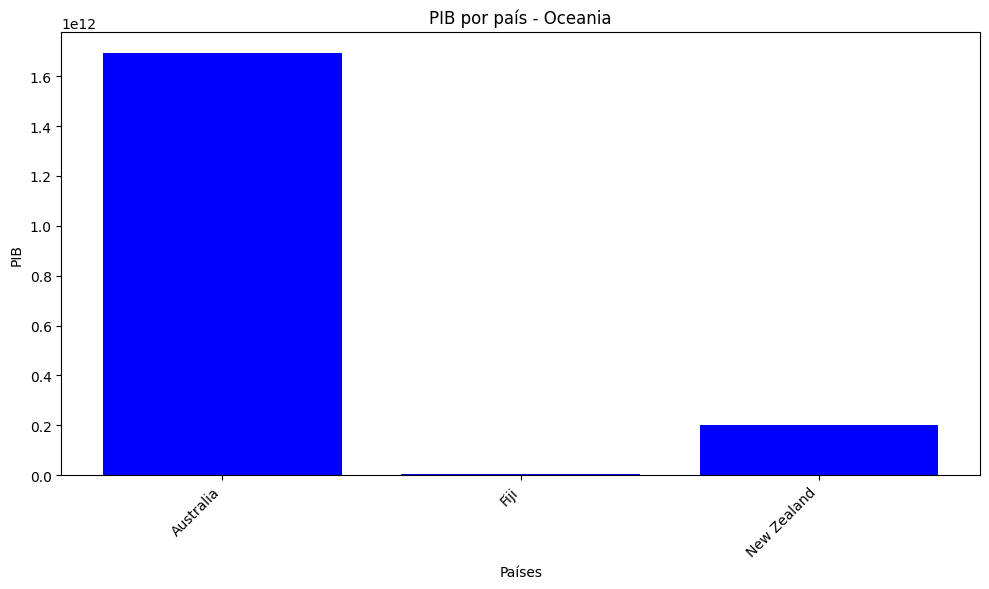

In [ ]:
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.bar(df_Oceania['CountryName'], df_Oceania['GDP'], color='blue', alpha=0.7)
plt.xlabel('Países')
plt.ylabel('PIB')
plt.title('PIB por país - Oceania')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

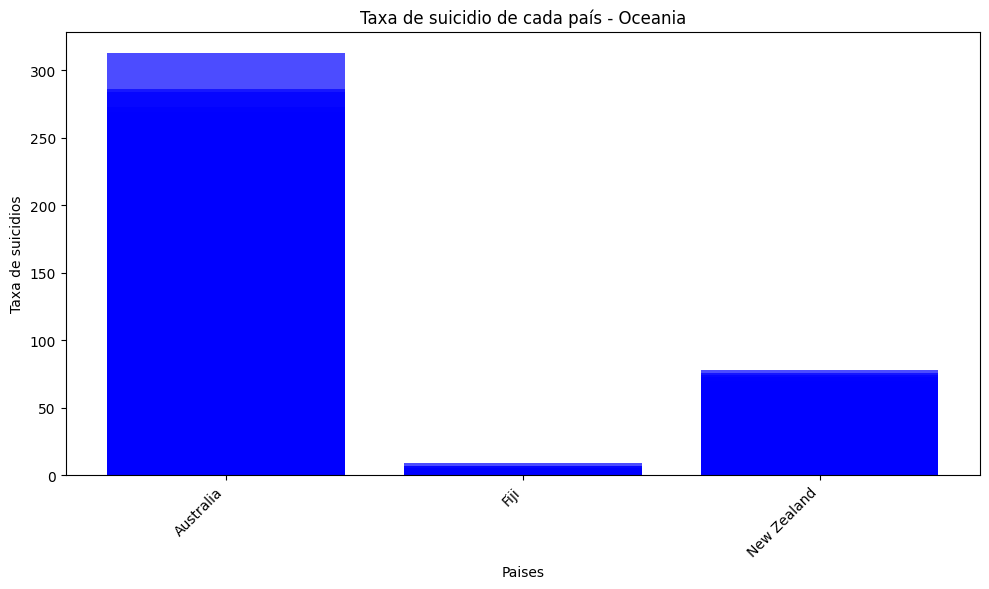

In [ ]:
#comparando a taxa de suicidio de alguns paises
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.bar(df_Oceania['CountryName'], df_Oceania['SuicideCount'], color='blue', alpha=0.7)
plt.xlabel('Paises')
plt.ylabel('Taxa de suicidios')
plt.title('Taxa de suicidio de cada país - Oceania')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

- Europa

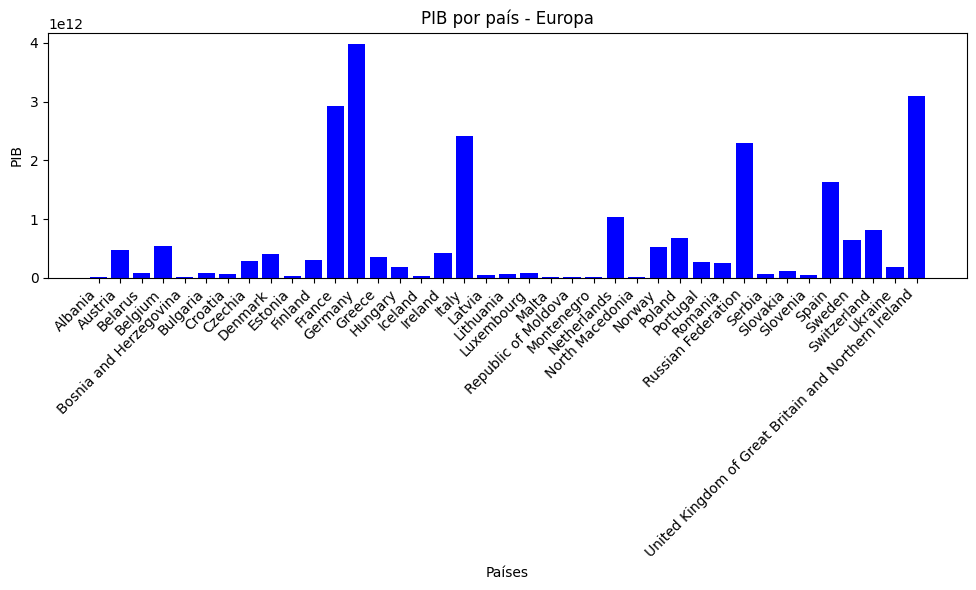

In [ ]:
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.bar(df_Europe['CountryName'], df_Europe['GDP'], color='blue', alpha=0.7)
plt.xlabel('Países')
plt.ylabel('PIB')
plt.title('PIB por país - Europa')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

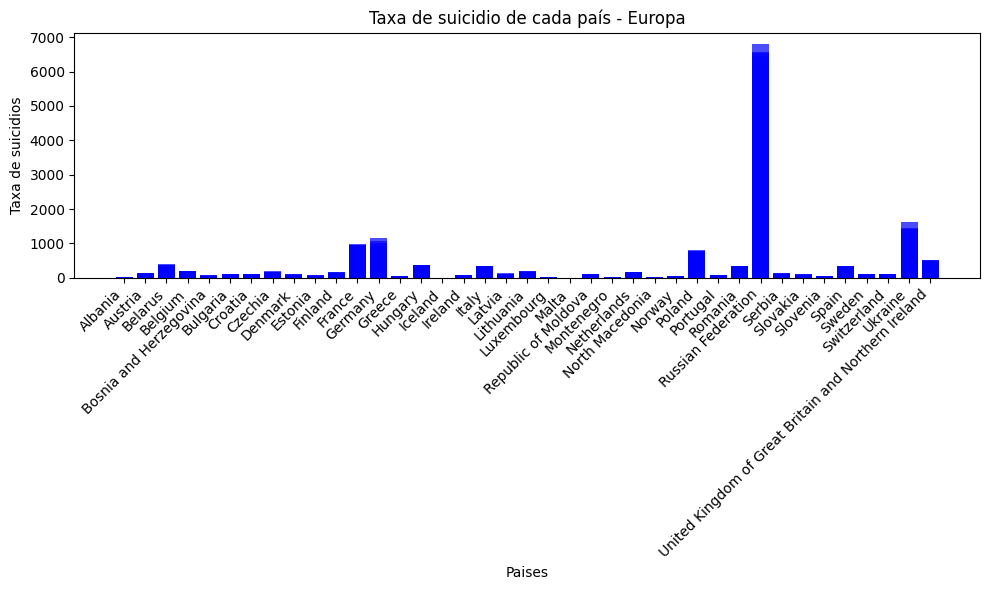

In [ ]:
#comparando a taxa de suicidio de alguns paises
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.bar(df_Europe['CountryName'], df_Europe['SuicideCount'], color='blue', alpha=0.7)
plt.xlabel('Paises')
plt.ylabel('Taxa de suicidios')
plt.title('Taxa de suicidio de cada país - Europa')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

- Ásia

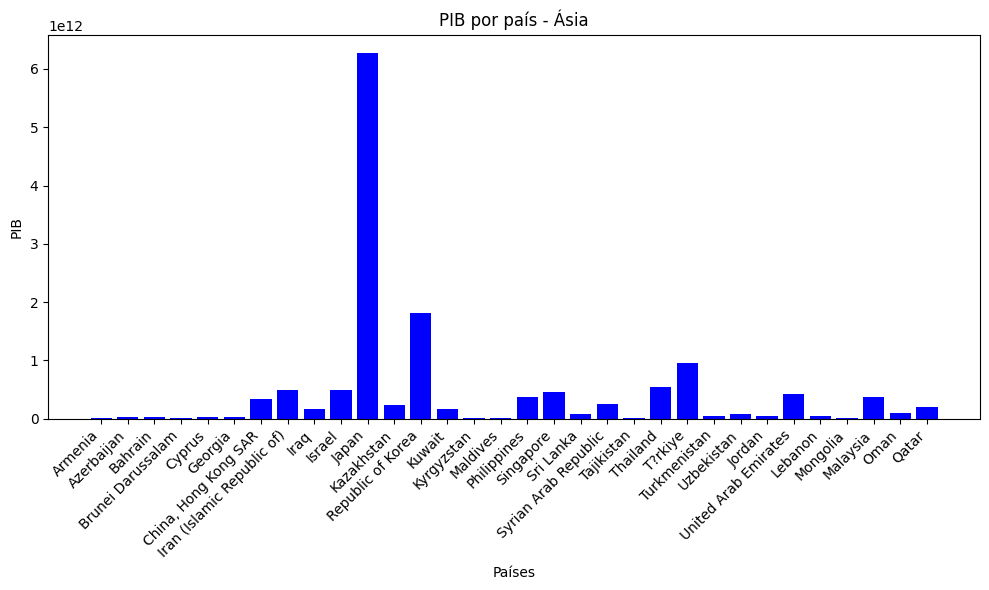

In [ ]:
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.bar(df_Asia['CountryName'], df_Asia['GDP'], color='blue', alpha=0.7)
plt.xlabel('Países')
plt.ylabel('PIB')
plt.title('PIB por país - Ásia')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

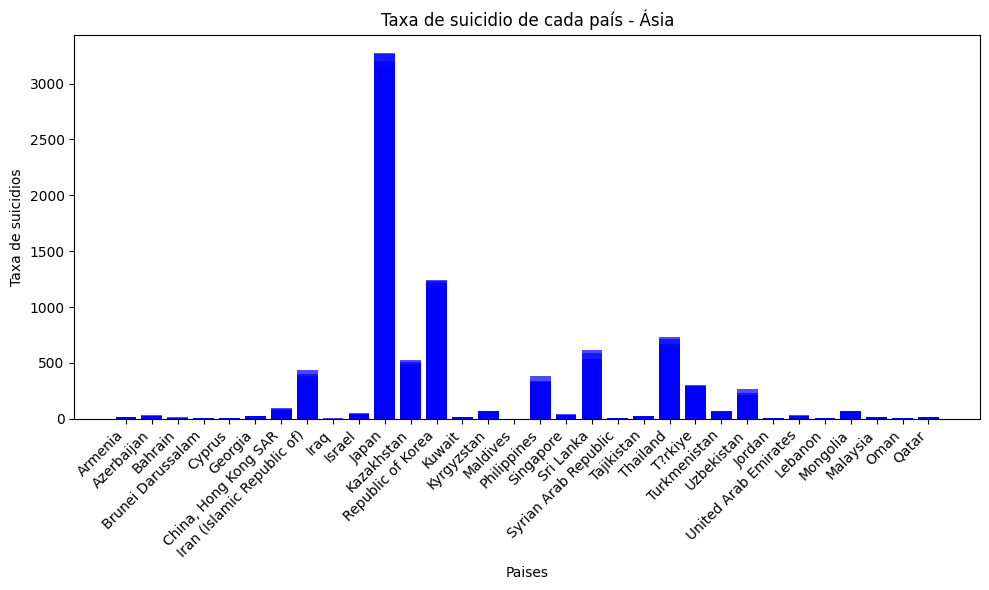

In [ ]:
#comparando a taxa de suicidio de alguns paises
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.bar(df_Asia['CountryName'], df_Asia['SuicideCount'], color='blue', alpha=0.7)
plt.xlabel('Paises')
plt.ylabel('Taxa de suicidios')
plt.title('Taxa de suicidio de cada país - Ásia')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

- África

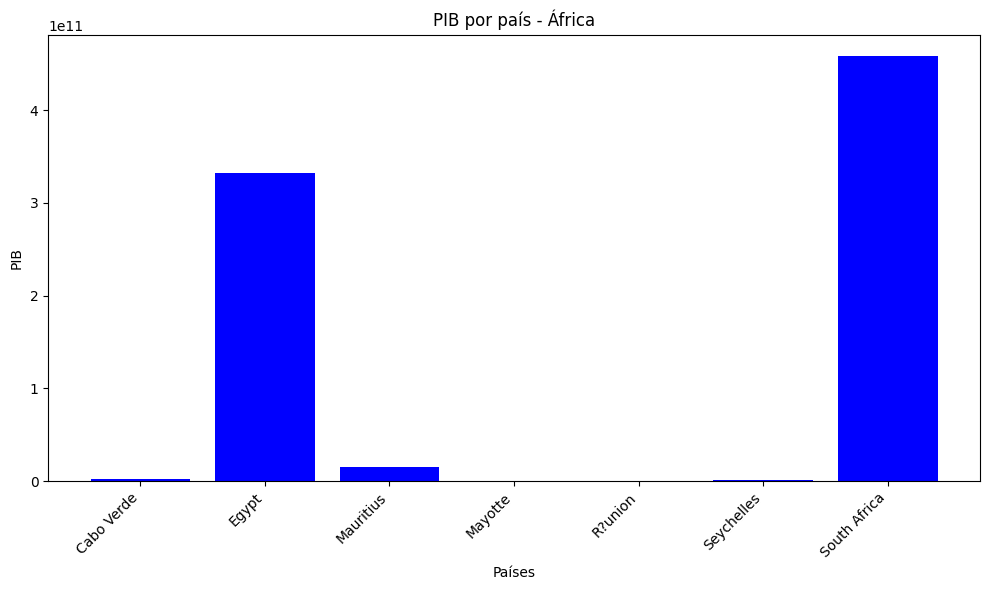

In [ ]:
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.bar(df_Africa['CountryName'], df_Africa['GDP'], color='blue', alpha=0.7)
plt.xlabel('Países')
plt.ylabel('PIB')
plt.title('PIB por país - África')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

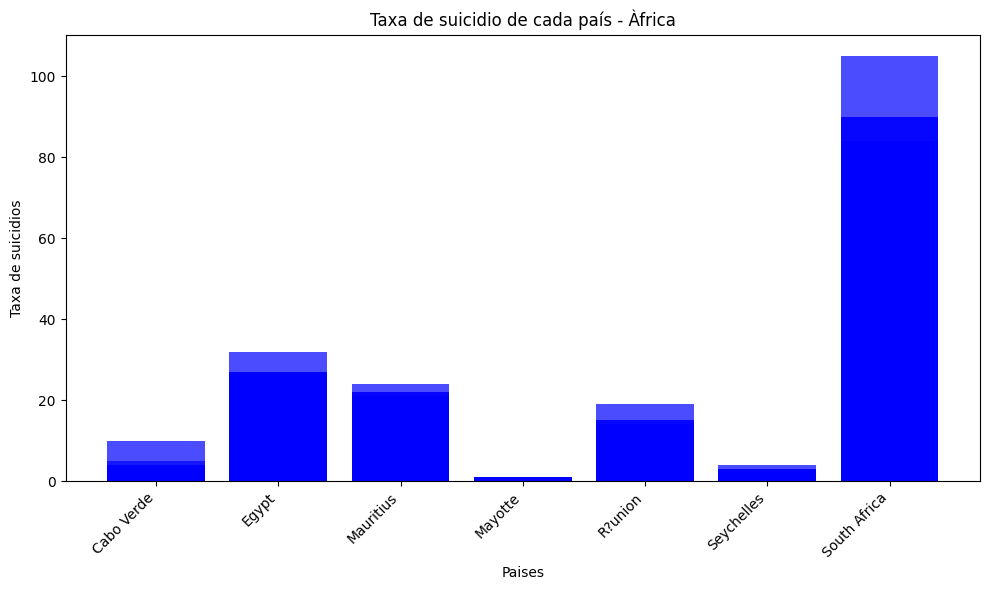

In [ ]:
#comparando a taxa de suicidio de alguns paises
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.bar(df_Africa['CountryName'], df_Africa['SuicideCount'], color='blue', alpha=0.7)
plt.xlabel('Paises')
plt.ylabel('Taxa de suicidios')
plt.title('Taxa de suicidio de cada país - Àfrica')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

# Taxa de suicídio por geração

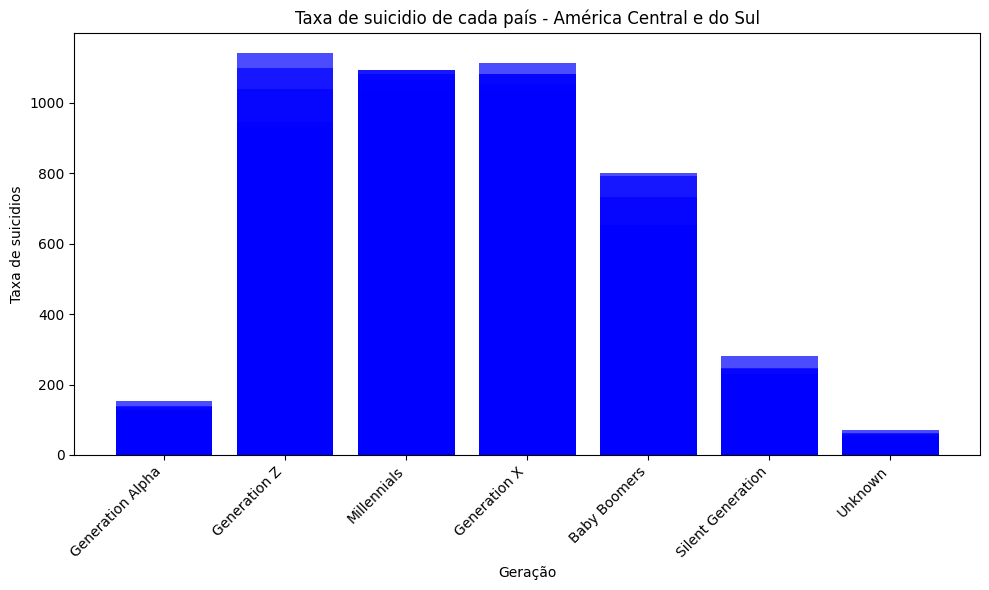

In [ ]:
#comparando a taxa de suicidio de alguns paises
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.bar(df_Central_South_America['Generation'], df_Central_South_America['SuicideCount'], color='blue', alpha=0.7)
plt.xlabel('Geração')
plt.ylabel('Taxa de suicidios')
plt.title('Taxa de suicidio de cada país - América Central e do Sul')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

O gráfico mostra que a geração Z, como é conhecida, está no topo da cadeia com o maior índice de ocorrências.

# Análise por faixa etária

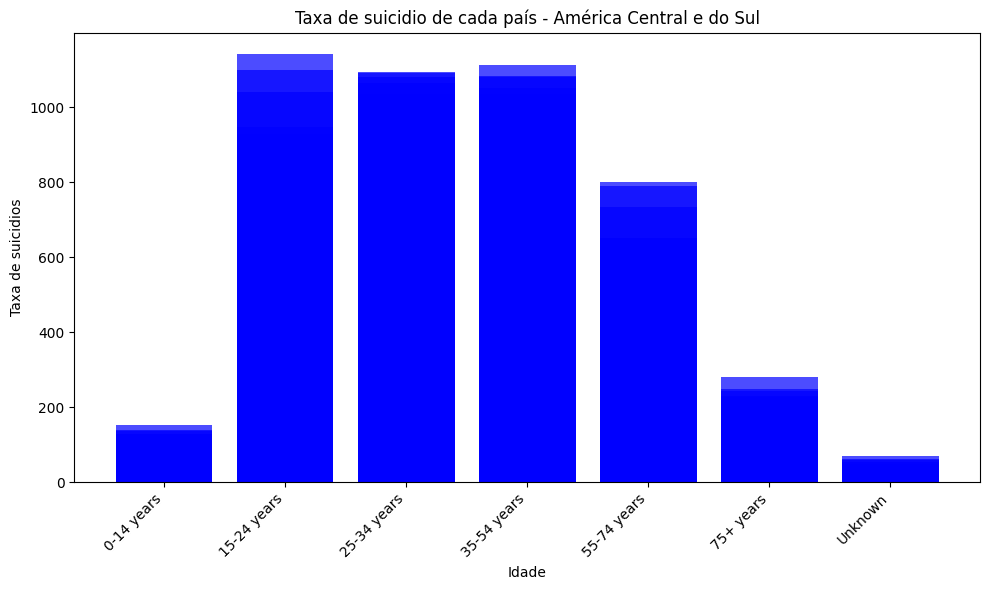

In [ ]:
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.bar(df_Central_South_America['AgeGroup'], df_Central_South_America['SuicideCount'], color='blue', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Taxa de suicidios')
plt.title('Taxa de suicidio de cada país - América Central e do Sul')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

**Os períodos em que mais há casos estão entre a juventude e vida adulta:**<br>
1° lugar - Entre 15 e 24 anos<br>
2° lugar - Entre 35 e 54 anos<br>
3° lugar - Entre 25 e 34 anos

#Apuração do total de casos - Homens vs Mulheres

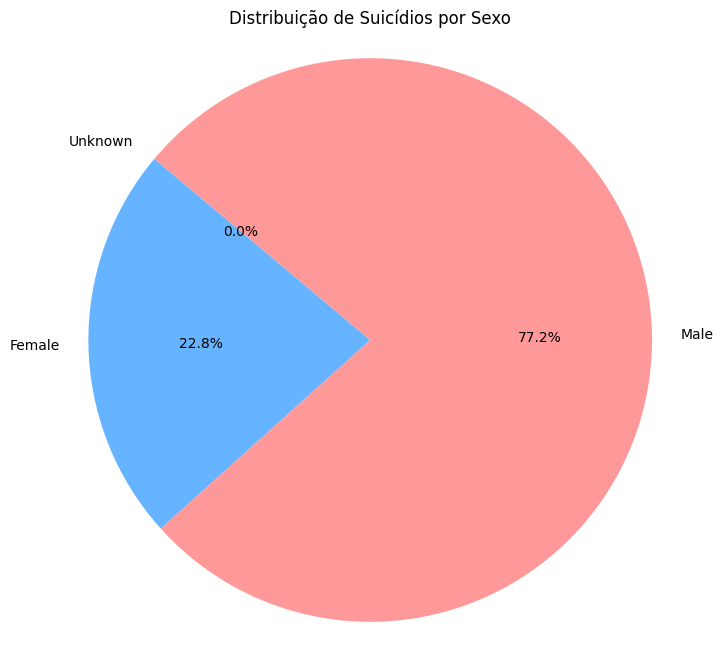

In [ ]:
# Removendo as linhas com valores nulos
df_menor = df_menor.dropna(subset=['SuicideCount'])

# Agrupando por sexo e somando os valores
suicides_by_sex = df_menor.groupby('Sex')['SuicideCount'].sum()

# Criando o grafico de pizza
plt.figure(figsize=(8, 8))
plt.pie(suicides_by_sex, labels=suicides_by_sex.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Distribuição de Suicídios por Sexo')
plt.axis('equal')
plt.show()

Com supremacia nos casos de suícido incluindo todas as regiões, o sexo masculino se destaca.<br>
**Homens** com **77.2%** do total de suicídios.<br>
**Mulheres** com **22.8%** do total de suicídios.

#Particionando a distribuição de suicídios por região

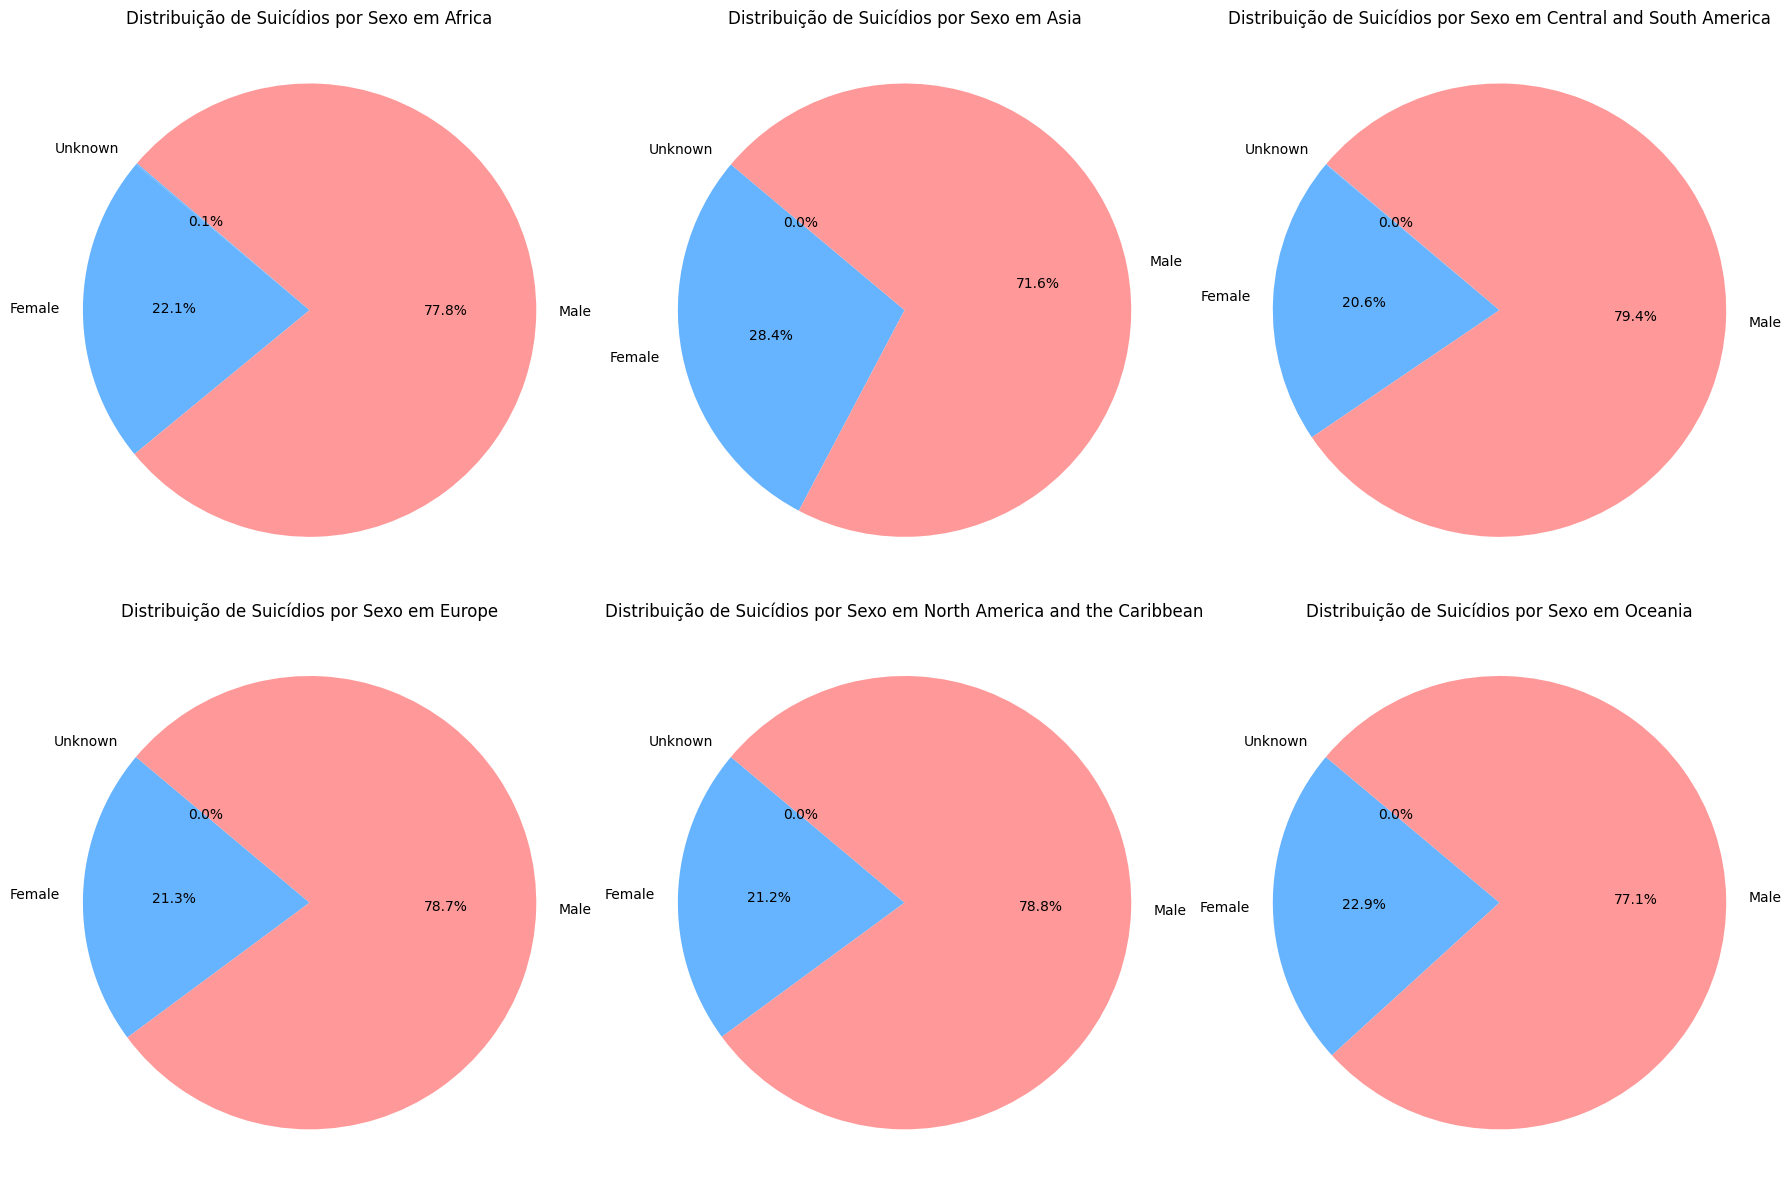

In [ ]:
#removendo as linhas com valores nulos
df_menor = df_menor.dropna(subset=['SuicideCount'])

# agrupando por região e sexo
suicides_by_region_sex = df_menor.groupby(['RegionName', 'Sex'])['SuicideCount'].sum().unstack()

# alterando valores NaN para 0
suicides_by_region_sex = suicides_by_region_sex.fillna(0)

# configurando o layout dos plots
regions = suicides_by_region_sex.index
num_regions = len(regions)
cols = 3  # Número de colunas
rows = (num_regions + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 6))

# ajustando eixos
axes = axes.flatten()

for i, region in enumerate(regions):
    suicides_by_sex = suicides_by_region_sex.loc[region]

    # ignorar regiões sem dados
    if suicides_by_sex.sum() == 0:
        continue

    axes[i].pie(suicides_by_sex, labels=suicides_by_sex.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
    axes[i].set_title(f'Distribuição de Suicídios por Sexo em {region}')
    axes[i].axis('equal')

# removendo subplot vazio caso tiver
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Acima podemos ver que o sexo **masculino** possui a
 **maior** fatia do gráfico em todas as regiões em relação as ocorrências, estando sempre superior a **70%** dos casos.  

#Realizando regressão linear simples - PIB vs Taxa de suicídio


                            OLS Regression Results                            
Dep. Variable:           SuicideCount   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                 2.781e+04
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        20:13:58   Log-Likelihood:            -7.6092e+05
No. Observations:              110856   AIC:                         1.522e+06
Df Residuals:                  110854   BIC:                         1.522e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.2949      0.725     43.136      0.0

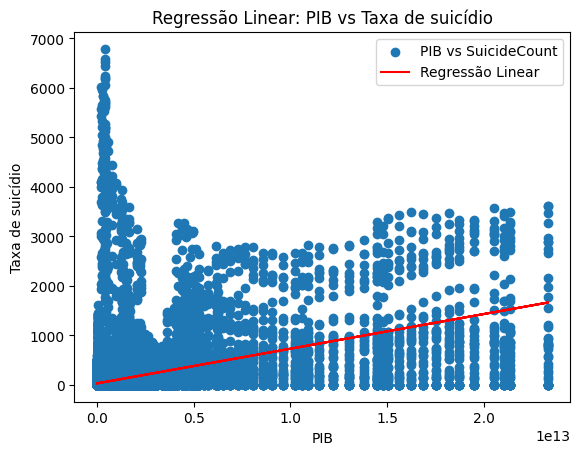

In [ ]:
df_menor = df_menor.dropna(subset=['GDP'])
df_menor = df_menor.dropna(subset=['SuicideCount'])

X = df_menor['GDP']  # Variável independente
Y = df_menor['SuicideCount']  # Variável dependente

X = sm.add_constant(X)  # Adiciona uma constante ao modelo (intercepto)

# Ajusta o modelo de regressão linear
modelo = sm.OLS(Y, X).fit()

# Apresenta a tabela do modelo
print(modelo.summary())

# Vizualização do ajuste do modelo:

plt.scatter(df_menor['GDP'], df_menor['SuicideCount'], label='PIB vs SuicideCount')
plt.plot(df_menor['GDP'], modelo.predict(), color='red', label='Regressão Linear')
plt.xlabel('PIB')
plt.ylabel('Taxa de suicídio')
plt.title('Regressão Linear: PIB vs Taxa de suicídio')
plt.legend()
plt.show()

#Implementando Modelo Xtreme Gradient Boosting XGBoosting - XGBOOST<br>
Agrupando Renda Nacional Bruta per capita e Produto Interno Bruto per capita ao PIB.

In [ ]:
#CRIAÇÃO DO DATA SET EM FORMATO DE ARRAY. O RESHAPE CRIA EM DUAS DIMENSÕES (uma coluna e várias linhas)
x = np.array(df_menor[['GDP','GNIPerCapita','GDPPerCapita']]) # variável independente x
y = np.array(df_menor['SuicideCount']) # variável dependente y

In [ ]:
#SEPARANDO OS DADOS DE TREINO E TESTE
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Print do número de linhas e o número de colunas
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(88684, 3)
(22172, 3)
(88684,)
(22172,)


In [ ]:
#CRIANDO O OBJETO DA REGRESSÃO XGBOOST
xgb_regressor = XGBRegressor(random_state=42)

#MODELO
xgb_regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
#UTILIZANDO O MODELO NOS DADOS DE TESTE
xgb_result = xgb_regressor.predict(x_test)
xgb_result[10]

22.282043

In [ ]:
#MÉTRICAS DE AVALIAÇÃO

# Erro Absoluto Médio (MAE): mede as distâncias entre valores preditos e observados.
# Essa métrica não é muito influenciada pelos outliers. Quanto menor seu valor, melhor
MAE_xgb = metrics.mean_absolute_error(y_test, xgb_result)
print('MAE_xgb:', metrics.mean_absolute_error(y_test, xgb_result))

# Erro Quadrático Médio (MSE): indicada para problemas nos quais grandes erros não são tolerados.
# Mais difícil de interpretar, pois eleva a unidade ao quadrado. Quanto menor seu valor, melhor
MSE_xgb = metrics.mean_squared_error(y_test, xgb_result)
print('MSE_xgb:', metrics.mean_squared_error(y_test, xgb_result))

# Raiz do Erro Quadrático Médio (RMSE): tem a mesma unidade dos valores observados e preditos.
# Seu resultado é uma medida do desvio médio (erro) entre observado e predito
RMSE_xgb = np.sqrt(metrics.mean_squared_error(y_test, xgb_result))
print('RMSE_xgb:', np.sqrt(metrics.mean_squared_error(y_test, xgb_result)))


MAE_xgb: 60.539842383549775
MSE_xgb: 45052.405371010085
RMSE_xgb: 212.25551905901077
